In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
img = cv2.imread("apple.jpg")
print (img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(612, 612, 3)


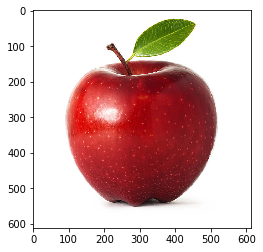

In [17]:
plt.imshow(img)

In [79]:
#Make size of an image to 32x32. This is already done for our dataset so not required.
def resized(img):
    res = cv2.resize(img,(32, 32), interpolation = cv2.INTER_AREA)
    return res

#Traslation. Done using translation matrix. Will perform 5x5 pixel translation

def translation(img):
    rows,cols,channel = img.shape
    M = np.float32([[1,0,5],[0,1,5]])
    #Third argument of the cv2.warpAffine() function is the size of the output image, 
    #which should be in the form of (width, height). 
    #Remember width = number of columns, and height = number of rows.
    trans = cv2.warpAffine(img,M,(cols,rows))
    return trans

def rotation_minor(img):
    rows,cols,channel = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),15,1)
    rot = cv2.warpAffine(img,M,(cols,rows))
    return rot

def affine_transform(img):
    rows,cols,channel = img.shape
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pts2 = np.float32([[1,10],[20,5],[10,25]])

    M = cv2.getAffineTransform(pts1,pts2)

    aff = cv2.warpAffine(img,M,(cols,rows))
    return aff

#Smoothing Techniques
def average_convolution(img):
    kernel = np.ones((5,5),np.float32)/25
    avg = cv2.filter2D(img,-1,kernel)
    return avg

def bluring(img):
    blur = cv2.blur(img,(5,5))
    return blur

def gaussian_bluring(img):
    gauss_blur = cv2.GaussianBlur(img,(5,5),0)
    return gauss_blur

def median_bluring(img):
    median_blur = cv2.medianBlur(img,5)
    return median_blur

#Erosion and Dilation
def erosion(img):
    kernel = np.ones((5,5),np.float32)
    img_erosion = cv2.erode(img, kernel, iterations=1)
    return img_erosion

def dilation(img):
    kernel = np.ones((5,5),np.float32)
    img_dilation = cv2.dilate(img, kernel, iterations=1)
    return img_dilation



(32, 32, 3)


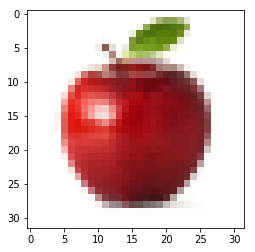

In [47]:
resized_img = resized(img)
plt.imshow(resized_img)
print (resized_img.shape)

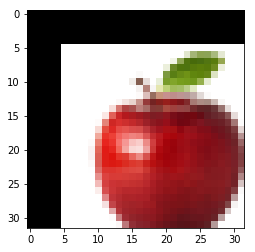

In [48]:
translated_img = translation(resized_img)
plt.imshow(translated_img)

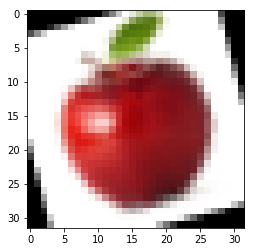

In [49]:
rotated_img = rotation_minor(resized_img)
plt.imshow(rotated_img)

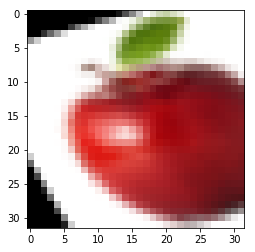

In [50]:
affine_img = affine_transform(resized_img)
plt.imshow(affine_img)

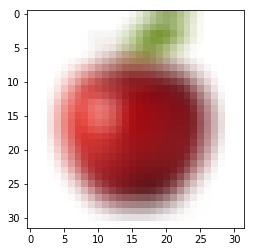

In [52]:
avg_img = average_convolution(resized_img)
plt.imshow(avg_img)

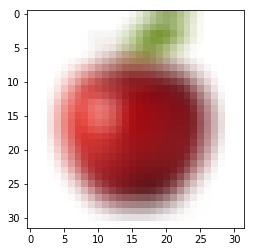

In [54]:
blur_img = bluring(resized_img)
plt.imshow(blur_img)

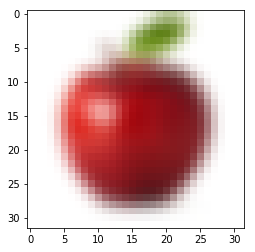

In [56]:
gaussian_blur_img = gaussian_bluring(resized_img)
plt.imshow(gaussian_blur_img)

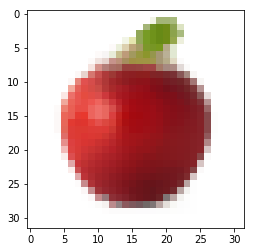

In [58]:
median_blur_img = median_bluring(resized_img)
plt.imshow(median_blur_img)

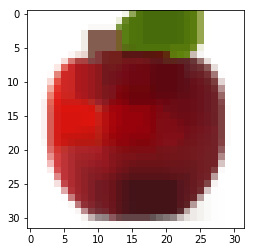

In [60]:
erode_img = erosion(resized_img)
plt.imshow(erode_img)

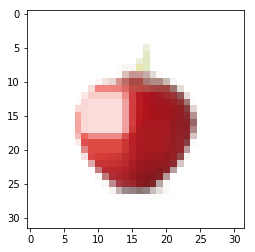

In [61]:
dilate_img = dilation(resized_img)
plt.imshow(dilate_img)

In [166]:
import os
from IPython.display import Image, display
directory = '/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/sample_dataset'
directory_out = '/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/sample_dataset/output'
final_images = []
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"): 
        input_path = os.path.join(directory, filename)
        img = cv2.imread(input_path)
        #print (img.shape)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resized_img = resized(img)
        cv2.imwrite(os.path.join(directory_out,filename),resized_img)
        final_images.append(img)
        


In [158]:
img_kiwi = cv2.imread("sample_dataset/kiwi.jpg")
print (img_kiwi.shape)

(2000, 3008, 3)


In [159]:

resized_img_kiwi = resized(img_kiwi)
translated_img_kiwi = translation(resized_img_kiwi)
rotated_img_kiwi = rotation_minor(resized_img_kiwi)
erode_img_kiwi = erosion(resized_img_kiwi)
dilate_img_kiwi = dilation(resized_img_kiwi)
affine_img_kiwi = affine_transform(resized_img_kiwi)
bluring_kiwi = bluring(resized_img_kiwi)
gaussian_bluring_kiwi = gaussian_bluring(resized_img_kiwi)
median_bluring_kiwi = median_bluring(resized_img_kiwi)
file_name, file_extension = os.path.splitext('kiwi.jpg')
print (file_name)
cv2.imwrite(os.path.join(directory_out,(file_name + '_resized.jpg')),resized_img_kiwi)
cv2.imwrite(os.path.join(directory_out,(file_name + '_translated.jpg')),translated_img_kiwi)
cv2.imwrite(os.path.join(directory_out,(file_name + '_rotated.jpg')),rotated_img_kiwi)
cv2.imwrite(os.path.join(directory_out,(file_name + '_eroded.jpg')),erode_img_kiwi)
cv2.imwrite(os.path.join(directory_out,(file_name + '_dilated.jpg')),dilate_img_kiwi)
cv2.imwrite(os.path.join(directory_out,(file_name + '_affined.jpg')),affine_img_kiwi)
cv2.imwrite(os.path.join(directory_out,(file_name + '_blurred.jpg')),bluring_kiwi)
cv2.imwrite(os.path.join(directory_out,(file_name + '_gauss.jpg')),gaussian_bluring_kiwi)
cv2.imwrite(os.path.join(directory_out,(file_name + '_med.jpg')),median_bluring_kiwi)



kiwi


True

In [160]:

X_new_data = []
y_new_data = []
for index,filename in enumerate(os.listdir(directory_out)):
    print (index)
    if filename.endswith(".jpg") or filename.endswith(".jpeg"): 
        input_path = os.path.join(directory_out, filename)
        print (input_path)
        img = cv2.imread(input_path)
        #print (img)




0
/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/sample_dataset/output/avocado_affined.jpg
1
/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/sample_dataset/output/avocado_blurred.jpg
2
/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/sample_dataset/output/avocado_dilated.jpg
3
/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/sample_dataset/output/avocado_eroded.jpg
4
/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/sample_dataset/output/avocado_gauss.jpg
5
/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/sample_dataset/output/avocado_med.jpg
6
/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/sample_dataset/output/avoca

In [163]:
import matplotlib.image as mpimg
input_path = os.path.join(directory_out, filename)
data = np.array([mpimg.imread(os.path.join(directory_out, name)) for name in os.listdir(directory_out)], dtype=np.float64)

In [165]:
#data_copy = data
final_data = np.concatenate((data_copy,data),axis=0)
print (final_data.shape)
print (data)

(27, 32, 32, 3)


In [162]:
y = np.ones(len(data),dtype = np.uint8)
y_copy = y

In [157]:
print (y.shape)

(9,)
